In [1]:
import NDEToolkit as ndt

### Class

In [16]:
import math
import numpy as np

class CscanManager:

    def __init__(self):
        
        self.gate1 = []
        self.gate2 = []

    def define_gate1(self,left,right,method = "max", lim = 0,type = 0):

        self.gate1 = [left,right,method,lim,type]
    
    def define_gate2(self,left,right,method = "max", lim = 0,type = 0):

        self.gate2 = [left,right,method,lim,type]
    
    def define_gate3(self,left,right,method = "max", lim = 0,type = 0):

        self.gate3 = [left,right,method,lim,type]
    

    def compute(self,data):

        gm = ndt.gateManager()

        if not self.gate1[4] :
            
            peak1 = gm.ifGate(data,self.gate1[0],self.gate1[1],lim=self.gate1[3],method=self.gate1[2])

        else:

            peak1 = gm.negativeGate(data,self.gate1[0],self.gate1[1],lim=self.gate1[3],method=self.gate1[2])


        if not self.gate2[4] :

            peak2 = gm.ifGate(data,self.gate2[0],self.gate2[1],lim=self.gate2[3],method=self.gate2[2])
        
        else:

            peak2 = gm.negativeGate(data,self.gate2[0],self.gate2[1],lim=self.gate2[3],method=self.gate2[2])
            
        return ((10 *  np.log10(np.divide(peak2, peak1)+0.0001)) *(-2))
    
    def compute_3(self,data):

        gm = ndt.gateManager()

        if not self.gate3[4] :
            
            peak3 = gm.ifGate(data,self.gate3[0],self.gate3[1],lim=self.gate3[3],method=self.gate3[2])

        else:

            peak3 = gm.negativeGate(data,self.gate3[0],self.gate3[1],lim=self.gate3[3],method=self.gate3[2])

            
        return ((10 *  np.log10(np.divide(peak3, 100)+0.0001)) *(-2))




### Pruebas

#### Data import

In [3]:
from pathlib import Path

#Opening file

folder_to_read = Path(r'Q:\11_AIRBUS\02_UltraSounds_Monolithic\20222012_Planchas_Grandes_con_referencia\20221220_planchas_airbus_yRef')

tiff_folder = folder_to_read /   r'225MHz_33dB_planchas_pegaso_cara_plana_yRef_amplitud.tif'

data = ndt.napari_read_tiff(tiff_folder,folder=False)
data.shape

(453, 1420, 497)

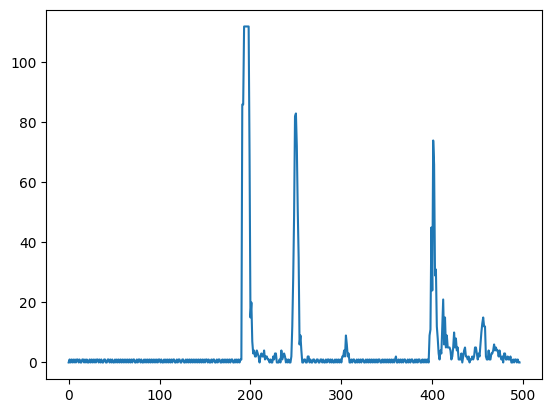

In [4]:
import matplotlib.pyplot as plt

x = 21
y = 882

plt.plot(data[x,y])

In [5]:
import matplotlib.pyplot as plt

rfa = ndt.RfAligner()

aligned = rfa.align(data,30,14,True)


In [6]:
ndt.write_tiff(aligned,folder_to_read / "aligned.tiff")

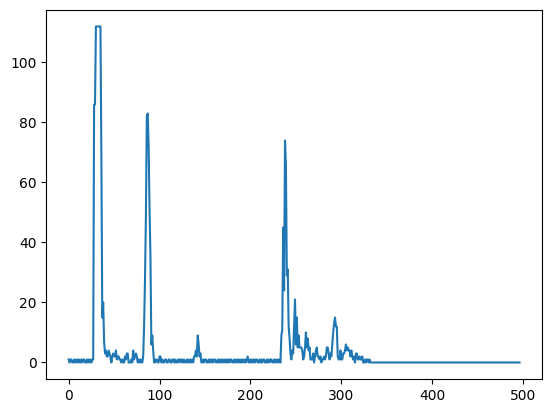

In [7]:
x = 21
y = 882

plt.plot(aligned[x,y])

### CScan

In [17]:
csm = CscanManager()

In [19]:
csm.define_gate1(0,50, lim = 40)
csm.define_gate2(75,200, lim = 5)
csm.define_gate3(200,400, lim = 0)

In [10]:
csm.compute(aligned[x,y])

2.6016266130998122

In [20]:
csm.compute_3(aligned[x,y])

2.6141919158120306

In [11]:
att = np.apply_along_axis(csm.compute, 2, aligned)

C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_15008\2904733047.py:45: RuntimeWarning: divide by zero encountered in divide
  return ((10 *  np.log10(np.divide(peak2, peak1)+0.0001)) *(-2))
C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_15008\2904733047.py:45: RuntimeWarning: invalid value encountered in divide
  return ((10 *  np.log10(np.divide(peak2, peak1)+0.0001)) *(-2))


In [21]:
att = np.apply_along_axis(csm.compute_3, 2, aligned)

In [12]:
att[x,y]

2.6016266130998122

In [22]:
import napari

viewer = napari.view_image(att, colormap='turbo')


In [23]:
ndt.write_tiff(att,folder_to_read / "att_peak3.tiff")